<a href="https://colab.research.google.com/github/jiw3026/SML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
train_path = 'https://raw.githubusercontent.com/jiw3026/SML/main/train.csv'
train = pd.read_csv(train_path)

In [4]:
# 결측치 0으로 처리
train.fillna(0,inplace = True)

In [5]:
#이상치 처리(IQR 25%~75%)
colL  = ['hour','hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_visibility',
      'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

train_iqr = train.copy()
for col in colL:
  Q1 = train_iqr[col].quantile(.25)
  Q3 = train_iqr[col].quantile(.75)
  IQR = Q3 - Q1
  train_del = train_iqr[((Q1-1.5*IQR) > train_iqr[col]) | ((Q3+1.5*IQR) < train_iqr[col])]
  train_iqr = train_iqr.drop(train_del.index, axis=0)
train_iqr

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [6]:
#train 데이터 내에서 X_train, X_test, y_train, y_test 데이터셋 분리함.
train_x = train_iqr.drop(['count'],axis = 1)
train_y = train_iqr['count']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

In [7]:
#X_train 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [8]:
#X_test 데이터 표준화
X_test=scaler.transform(X_test)

2. Decision Tree Parameter 비교

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성 및 파라미터 설정
dt_clf = DecisionTreeClassifier(random_state=42)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [x for x in range(3, 15,2)],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 11,2)]
}

In [77]:
# 최적의 파라미터 찾기
grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 5)

grid_dt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [3, 5, 7, 9, 11, 13]})

In [89]:
#최적의 하이퍼파라미터
print('Best Parameter : {}'.format(grid_dt.best_params_))
#train데이터 정확도
print('Best Train Score : {:.4f}'.format(grid_dt.best_score_))
#test데이터 정확도
print('Best Test Score : {:.4f}'.format(grid_dt.score(X_test,y_test)))

Best Parameter : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 3}
Best Train Score : 0.0349
Best Test Score : 0.0127


In [90]:
params_result = pd.DataFrame(grid_dt.cv_results_['params'])
params_result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
params_result.sort_values(by='mean_test_score', ascending=False)

params_result.head(10)

,criterion,max_depth,min_samples_leaf,min_samples_split,mean_test_score
0,gini,3,1,3,0.033862
1,gini,3,1,5,0.033862
2,gini,3,1,7,0.033862
3,gini,3,1,9,0.033862
4,gini,3,1,11,0.033862
5,gini,3,1,13,0.033862
6,gini,3,3,3,0.032804
7,gini,3,3,5,0.032804
8,gini,3,3,7,0.032804
9,gini,3,3,9,0.032804


In [91]:
params_result['rmse']=np.sqrt(abs(params_result['mean_test_score']))

In [92]:
params_result.head(10)

,criterion,max_depth,min_samples_leaf,min_samples_split,mean_test_score,rmse
0,gini,3,1,3,0.033862,0.184017
1,gini,3,1,5,0.033862,0.184017
2,gini,3,1,7,0.033862,0.184017
3,gini,3,1,9,0.033862,0.184017
4,gini,3,1,11,0.033862,0.184017
5,gini,3,1,13,0.033862,0.184017
6,gini,3,3,3,0.032804,0.181119
7,gini,3,3,5,0.032804,0.181119
8,gini,3,3,7,0.032804,0.181119
9,gini,3,3,9,0.032804,0.181119


3. 결론

In [93]:
# 최적의 parameter 적용하여 모델 생성

dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth= 3, min_samples_leaf= 7, min_samples_split= 3)
dt.fit(X_train, y_train)

print("train data accuracy: {:.3f}".format(dt.score(X_train, y_train)))
print("test data accuracy: {:.3f}".format(dt.score(X_test, y_test)))


train data accuracy: 0.056
test data accuracy: 0.013


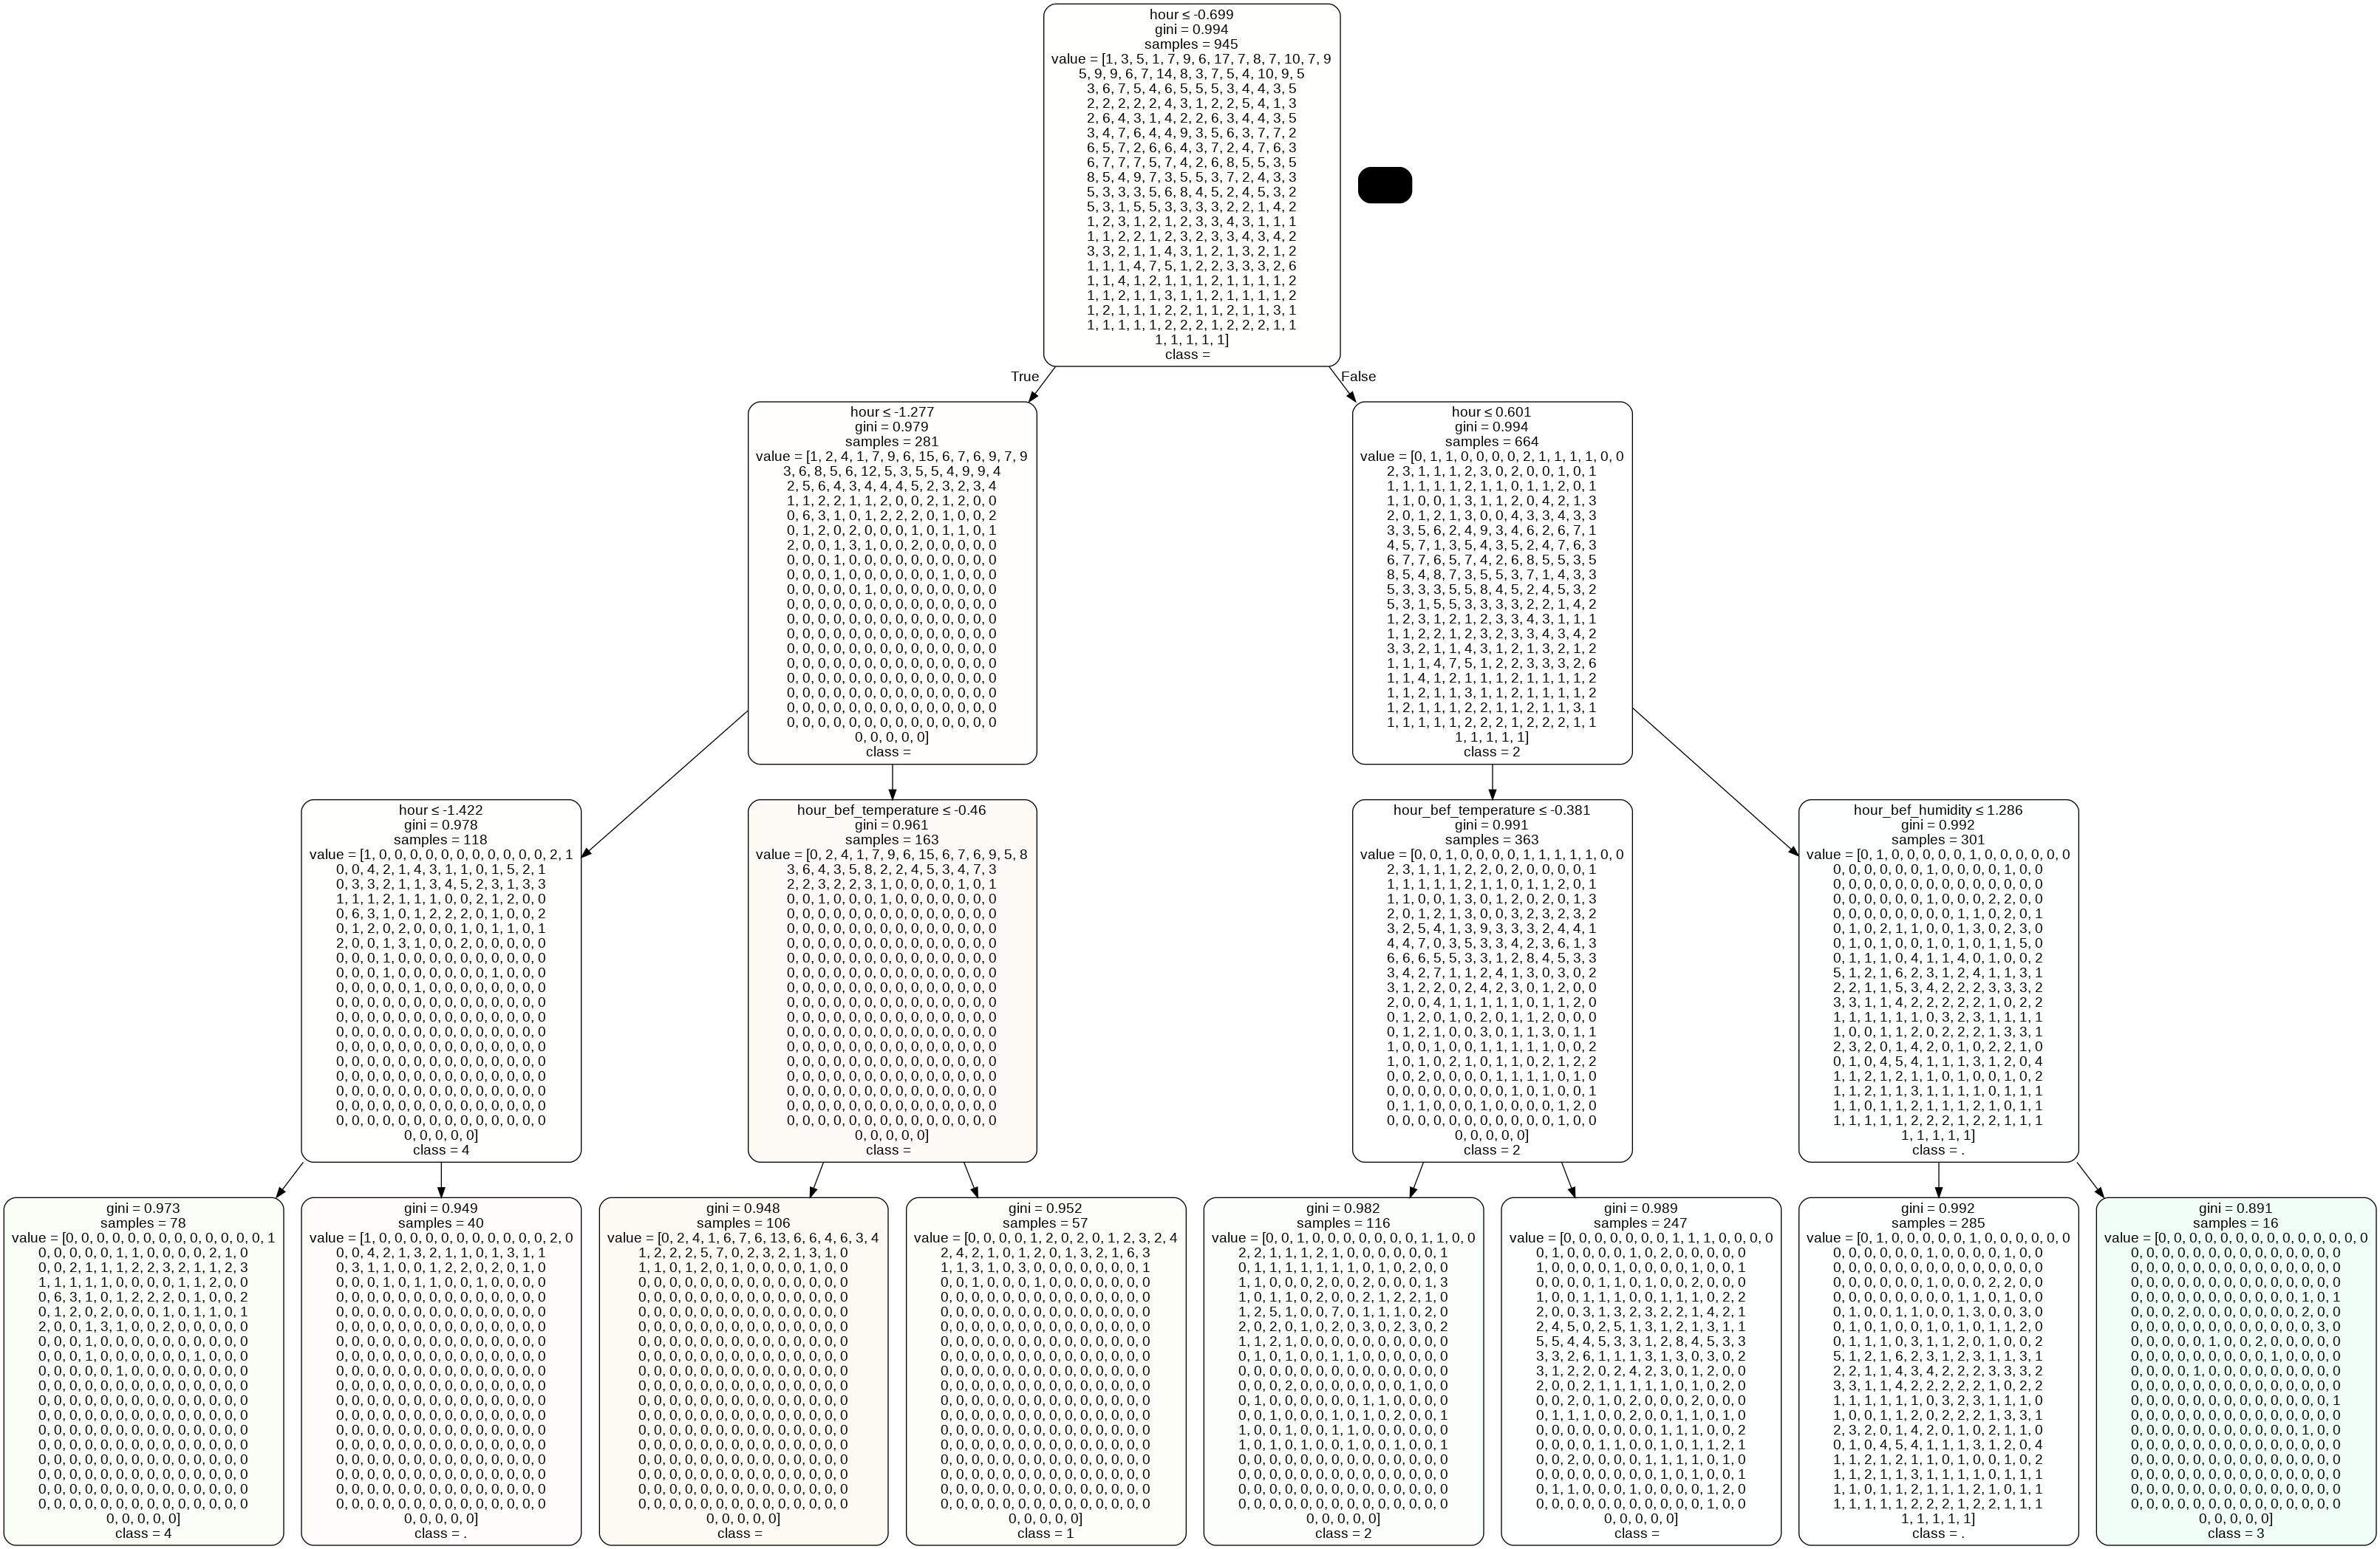

In [95]:
# Decision Tree 시각화

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

x_list = list(train_x.columns)
y_list = list(train_y.drop_duplicates(inplace=False))

dot_data = export_graphviz(dt, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [98]:
# Feature Importance 보여주는 함수
import matplotlib.pyplot as plt
import seaborn as sns

def show_importance(model, title):
  importance = model.feature_importances_
  feature = train_x.columns
  importances = pd.DataFrame()
  importances['feature'] = feature
  importances['importances'] = importance
  importances.sort_values('importances', ascending=False, inplace=True)
  importances.reset_index(drop=True, inplace=True)
  
  plt.figure(figsize=(10, 8))
  sns.barplot(x='importances', y='feature', data=importances)
  plt.title(title, fontsize=18)
  plt.show()

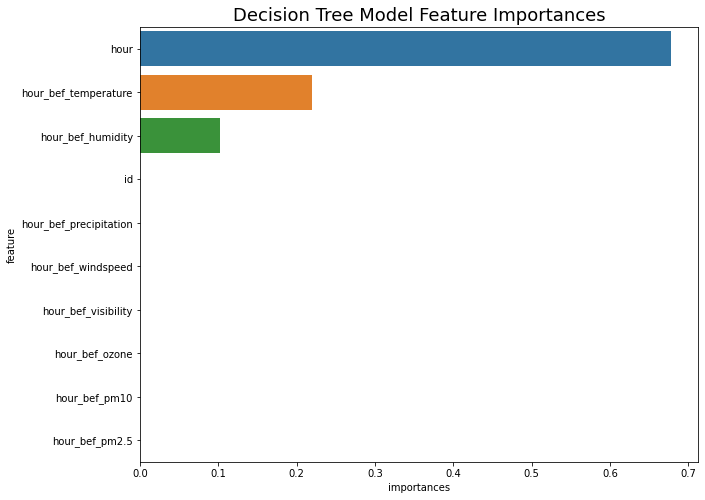

In [99]:
show_importance(dt, "Decision Tree Model Feature Importances")